<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bootstrap" data-toc-modified-id="Bootstrap-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bootstrap</a></span></li><li><span><a href="#Statistical-property-of-[mean-of-the-N-numbers]" data-toc-modified-id="Statistical-property-of-[mean-of-the-N-numbers]-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Statistical property of [mean of the N numbers]</a></span><ul class="toc-item"><li><span><a href="#Generating-N-random-numbers" data-toc-modified-id="Generating-N-random-numbers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Generating N random numbers</a></span></li><li><span><a href="#By-theory" data-toc-modified-id="By-theory-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>By theory</a></span></li><li><span><a href="#Or,-doing-monate-carlo,-because-we-know-how-the-N-numbers-were-generated!" data-toc-modified-id="Or,-doing-monate-carlo,-because-we-know-how-the-N-numbers-were-generated!-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Or, doing monate carlo, because we know how the N numbers were generated!</a></span></li><li><span><a href="#Or,-we-can-bootstrap-with-original-sample" data-toc-modified-id="Or,-we-can-bootstrap-with-original-sample-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Or, we can bootstrap with original sample</a></span></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Comparison</a></span></li></ul></li><li><span><a href="#Exercise" data-toc-modified-id="Exercise-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercise</a></span><ul class="toc-item"><li><span><a href="#Generating-N-numbers" data-toc-modified-id="Generating-N-numbers-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Generating N numbers</a></span></li><li><span><a href="#Estimation-of-the-error" data-toc-modified-id="Estimation-of-the-error-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Estimation of the error</a></span></li><li><span><a href="#Using-bootstrap!" data-toc-modified-id="Using-bootstrap!-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Using bootstrap!</a></span></li></ul></li></ul></div>

# Bootstrap


 # Statistical property of [mean of the N numbers]

## Generating N random numbers

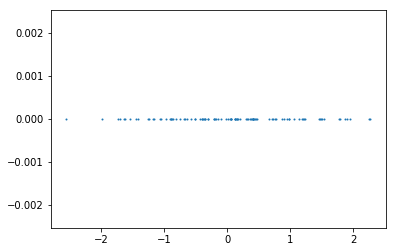

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N=100
np.random.seed(0)
X=np.random.randn(N)
plt.scatter(X,np.zeros(N), s=1)
plt.show()


## By theory

In [2]:
print("the expectation of [mean of N numbers] (theory)", 0)
print("the       stdev of [mean of N numbers] (theory)", 1/np.sqrt(N))

the expectation of [mean of N numbers] (theory) 0
the       stdev of [mean of N numbers] (theory) 0.1


## Or, doing monate carlo, because we know how the N numbers were generated!

In [3]:
np.random.seed(234)
Xs=np.random.randn(100000,N)
rmeans=np.mean(Xs,axis=1)
rmean=np.mean(rmeans)
rstddev=np.std(rmeans, ddof=1)
print("the expectation of [mean of N numbers] (monte carlo)", rmean)
print("the       stdev of [mean of N numbers] (monte carlo)", rstddev)

the expectation of [mean of N numbers] (monte carlo) 4.335782196302293e-05
the       stdev of [mean of N numbers] (monte carlo) 0.10020249094145829


## Or, we can bootstrap with original sample

In [4]:
np.random.seed(234)
sample=np.random.choice(X,size=[100000,N],replace=True)
bmeans=np.mean(sample,axis=1)
bmean=np.mean(bmeans)
bstddev=np.std(bmeans, ddof=1)
print("the expectation of [mean of N numbers] (bootstrap sampling)", bmean)
print("the       stdev of [mean of N numbers] (bootstrap sampling)", bstddev)


the expectation of [mean of N numbers] (bootstrap sampling) 0.06064693264093737
the       stdev of [mean of N numbers] (bootstrap sampling) 0.10097970829675619


## Comparison

the expectation of [mean of N numbers] (theory) 0
the       stdev of [mean of N numbers] (theory) 0.1
the expectation of [mean of N numbers] (monte carlo) 4.335782196302293e-05
the       stdev of [mean of N numbers] (monte carlo) 0.10020249094145829
the expectation of [mean of N numbers] (bootstrap sampling) 0.06064693264093737
the       stdev of [mean of N numbers] (bootstrap sampling) 0.10097970829675619


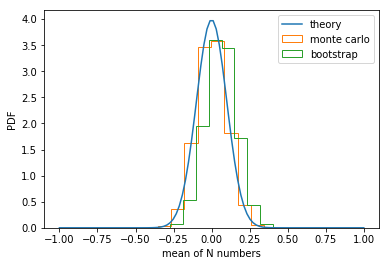

In [5]:
print("the expectation of [mean of N numbers] (theory)", 0)
print("the       stdev of [mean of N numbers] (theory)", 1/np.sqrt(N))
print("the expectation of [mean of N numbers] (monte carlo)", rmean)
print("the       stdev of [mean of N numbers] (monte carlo)", rstddev)
print("the expectation of [mean of N numbers] (bootstrap sampling)", bmean)
print("the       stdev of [mean of N numbers] (bootstrap sampling)", bstddev)


l2=plt.plot(np.linspace(-1,1,100), 1/np.sqrt(2*np.pi)/0.1*np.exp( -np.linspace(-1,1,100)**2 / (2*0.01)), label="theory")
l2=plt.hist(rmeans,density=True,histtype='step',label="monte carlo")
l1=plt.hist(bmeans,density=True,histtype='step',label="bootstrap")
plt.legend()
plt.xlabel("mean of N numbers")
plt.ylabel("PDF")
plt.show()



# Exercise

## Generating N numbers

we can estimate the mean and stddev

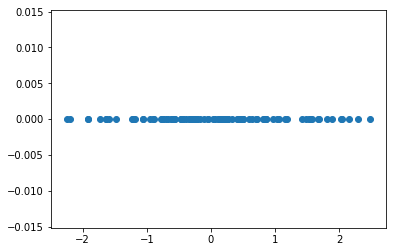

  mean = 0.054
stddev = 1.046


In [6]:
def data_of_unkonw_distribution():
    np.random.seed(0)
    N=100
    X=np.random.randn(N) + np.random.rand(N) - 0.5
    return X
    
X=data_of_unkonw_distribution()
plt.scatter(X,np.zeros(N))
plt.show()

mean=np.mean(X)
stddev=np.std(X, ddof=1)
print("  mean = %.3f"%(mean))
print("stddev = %.3f"%(stddev))


## Estimation of the error
We can estimate the error of mean. But how to estimate the error of stddev?
we can't do monte carlo, because we have don't the exact distribution of the data.

In [9]:
print("  mean = %.3f +- %.3f"%(mean,stddev/np.sqrt(N)))
print("stddev = %.3f +- ?"%(stddev))

  mean = 0.054 +- 0.105
stddev = 1.046 +- ?


## Using bootstrap!

In [10]:
np.random.seed(234)
sample=np.random.choice(X,size=[1000000,N],replace=True)
bmeans=np.mean(sample,axis=1)
bstddevs=np.std( sample, axis=1 , ddof=1)

bmeanstddev=np.std(bmeans, ddof=1)
bstddevstddev=np.std(bstddevs, ddof=1)

print("bootstrap 1 sigma error of mean    = %f"%(bmeanstddev))
print("bootstrap 1 sigma error of stddev  = %f"%(bstddevstddev))


bootstrap 1 sigma error of mean    = 0.104135
bootstrap 1 sigma error of stddev  = 0.068363


Wow, the 1 sigma error of mean is closed to the one of theory!
We believe the 1 sigma error of stddev is also closed to the one of theory!